# **Project Report on Electric Vehicle (EV) Database**
    By: Anjala 055005 & Dimple 055009
## **Subject: BDMA (Big Data Management and Analytics)**

## **1. Introduction**
The Electric Vehicle (EV) industry is growing rapidly, necessitating efficient data management for vehicle sales, dealerships, customer relationships, suppliers, and services. This project aims to design and implement a well-structured **EV Database System** using SQL to handle all essential operations effectively.

## **2. Objectives**
- To design an **Entity-Relationship Diagram (ERD)** for an EV database.
- To implement a **relational database schema** based on normalization principles.
- To perform **CRUD (Create, Read, Update, Delete) operations**.
- To execute **JOIN queries** for data retrieval across multiple tables.
- To ensure data integrity through **First Normal Form (1NF), Second Normal Form (2NF), and Third Normal Form (3NF) checks**.

## **3. Database Design**
### **3.1 Entity-Relationship Diagram (ERD)**
The ERD represents the relationships among different entities in the EV database. The main entities include:
- **Vehicles** (Vehicle_ID, Model_Name, Battery_Capacity, avg_range, Price, Manufacturing_Date, Status)
- **Dealerships** (Dealership_ID, Dealer_Name, Location, Contact, Manager_Name)
- **Customers** (Customer_ID, Cust_Name, Email, Phone, Address, Date_of_Birth, Customer_Type)
- **Suppliers** (Supplier_ID, Supp_Name, Supp_Contact, Supp_Address)
- **Orders** (Order_ID, Customer_ID, Vehicle_ID, Order_Date, Delivery_Date, Payment_Status)
- **Services** (Service_ID, Vehicle_ID, Service_Type, Service_Date, Service_Cost)
- **Charging_Stations** (Station_ID, Location, Capacity)
- **Batteries** (Battery_ID, Capacity, Installation_Date, Warranty_Expiry)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wiYRfkWtY_THZrlnpb7RtjrR3qfq--YI
To: /content/image.jpg
100% 65.9k/65.9k [00:00<00:00, 4.93MB/s]


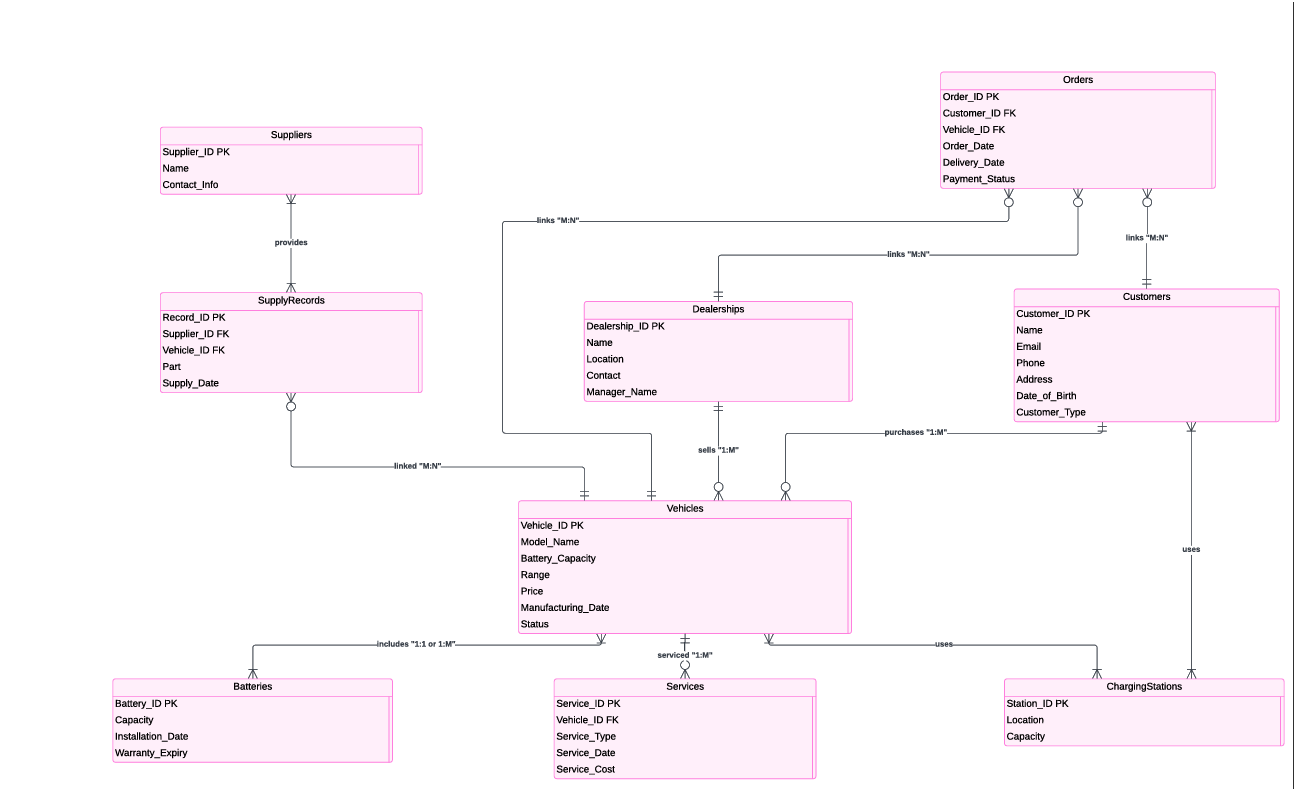

In [ ]:
!gdown --id 1wiYRfkWtY_THZrlnpb7RtjrR3qfq--YI -O image.jpg

# Display the image
from PIL import Image
from IPython.display import display

image = Image.open("image.jpg")
display(image)

**3.2 Relational Schema**

The tables were created using SQL DDL (Data Definition Language) commands, incorporating primary and foreign key constraints to ensure data consistency.

**4. Implementation & Operations**

4.1 Database Creation

In [ ]:
show databases;
create database ac_ev;
drop database if exists ac_ev;
create database ac;
drop database if exists ac;
create database ac_ev;
use ac_ev;

**4.2 Table Creation**

Tables were designed with proper constraints, including Primary Keys, Foreign Keys, NOT NULL, and UNIQUE constraints. Example:

In [ ]:
CREATE TABLE vehicles(
    Vehicle_ID INT PRIMARY KEY, -- Vehicle ID is the primary key
    Model_Name VARCHAR(100),    -- Model Name
    Battery_Capacity FLOAT,     -- Battery Capacity in kWh or suitable units
    avg_range INT,                  -- Range in kilometers or miles
    Price DECIMAL(10, 2),       -- Price with up to 10 digits and 2 decimal places
    Manufacturing_Date DATE,    -- Manufacturing Date
    Status VARCHAR(50)          -- Status (e.g., Available, Sold, etc.)
);

drop table if exists vehicle_id;
CREATE TABLE dealerships (
    Dealership_ID INT PRIMARY KEY AUTO_INCREMENT, -- Unique identifier for each dealership
    Dealer_Name VARCHAR(100) NOT NULL,                  -- Name of the dealership
    Location VARCHAR(150),                       -- Location of the dealership
    Contact VARCHAR(15),                         -- Contact number (e.g., phone)
    Manager_Name VARCHAR(100)                    -- Name of the manager
);
CREATE TABLE customers (
    Customer_ID INT PRIMARY KEY AUTO_INCREMENT, -- Unique Customer ID (auto-incremented)
    Cust_Name VARCHAR(100) NOT NULL,                -- Name of the customer
    Email VARCHAR(150) UNIQUE,                 -- Email address (must be unique)
    Phone VARCHAR(15),                         -- Phone number
    Address VARCHAR(255),                      -- Address of the customer
    Date_of_Birth DATE,                        -- Date of Birth in YYYY-MM-DD format
    Customer_Type VARCHAR(50)                  -- Type of customer (e.g., Regular, Premium, etc.)
);
CREATE TABLE suppliers (
    Supplier_ID INT PRIMARY KEY AUTO_INCREMENT, -- Unique Supplier ID (auto-incremented)
    Supp_Name VARCHAR(100) NOT NULL,                -- Name of the supplier
    Supp_Contact VARCHAR(15),                       -- Contact number (e.g., phone)
    Supp_Address VARCHAR(255)                       -- Address of the supplier
);
CREATE TABLE orders (
    Order_ID INT PRIMARY KEY AUTO_INCREMENT,   -- Unique Order ID (auto-incremented)
    Customer_ID INT NOT NULL,                  -- Foreign Key referencing customers table
    Vehicle_ID INT NOT NULL,                   -- Foreign Key referencing vehicle_id table
    Order_Date DATE NOT NULL,                  -- Order date
    Delivery_Date DATE,                        -- Delivery date
    Payment_Status VARCHAR(50),               -- Payment status (e.g., Paid, Pending, etc.)
    FOREIGN KEY (Customer_ID) REFERENCES customers(Customer_ID), -- FK to customers
    FOREIGN KEY (Vehicle_ID) REFERENCES vehicles(Vehicle_ID)   -- FK to vehicle_id
);

CREATE TABLE supply_record (
    Record_ID INT PRIMARY KEY AUTO_INCREMENT,    -- Unique Record ID (auto-incremented)
    Supplier_ID INT NOT NULL,                    -- Foreign Key referencing suppliers table
    Vehicle_ID INT NOT NULL,                     -- Foreign Key referencing vehicle_id table
    Part VARCHAR(100) NOT NULL,                  -- Part supplied (e.g., Battery, Engine, etc.)
    Supply_Date DATE NOT NULL,                   -- Date of supply
    FOREIGN KEY (Supplier_ID) REFERENCES suppliers(Supplier_ID), -- FK to suppliers
    FOREIGN KEY (Vehicle_ID) REFERENCES vehicles(Vehicle_ID)   -- FK to vehicle_id
);
CREATE TABLE services (
    Service_ID INT PRIMARY KEY AUTO_INCREMENT, -- Unique Service ID (auto-incremented)
    Vehicle_ID INT NOT NULL,                   -- Foreign Key referencing vehicle_id table
    Service_Type VARCHAR(100) NOT NULL,        -- Type of service (e.g., Maintenance, Repair, etc.)
    Service_Date DATE NOT NULL,                -- Date of the service
    Service_Cost DECIMAL(10, 2) NOT NULL,      -- Cost of the service
    FOREIGN KEY (Vehicle_ID) REFERENCES vehicles(Vehicle_ID) -- FK to vehicle_id
);
CREATE TABLE charging_station (
    Station_ID INT PRIMARY KEY AUTO_INCREMENT, -- Unique Station ID (auto-incremented)
    Location VARCHAR(150) NOT NULL,            -- Location of the charging station
    Capacity INT NOT NULL                     -- Capacity of the station (e.g., number of charging points)
);
CREATE TABLE batteries (
    Battery_ID INT PRIMARY KEY AUTO_INCREMENT, -- Unique Battery ID (auto-incremented)
    Capacity FLOAT NOT NULL,                   -- Capacity of the battery (e.g., in kWh)
    Installation_Date DATE NOT NULL,           -- Installation date of the battery
    Warranty_Expiry DATE NOT NULL              -- Warranty expiry date
);


In [ ]:
show tables;

# 4.3. Inserting Records

In [ ]:
-- Insert into vehicles
INSERT INTO vehicles (Vehicle_ID, Model_Name, Battery_Capacity, avg_range, Price, Manufacturing_Date, Status) VALUES
(1, 'Tesla Model S', 100, 600, 79999.99, '2023-05-10', 'Available'),
(2, 'Nissan Leaf', 40, 250, 31999.99, '2022-08-15', 'Available'),
(3, 'Chevy Bolt', 66, 400, 36999.99, '2023-02-20', 'Sold'),
(4, 'BMW i4', 80, 520, 54999.99, '2022-11-01', 'Available'),
(5, 'Ford Mustang Mach-E', 88, 500, 45999.99, '2023-07-22', 'Sold'),
(6, 'Hyundai Ioniq 5', 72, 480, 41999.99, '2023-06-18', 'Available'),
(7, 'Audi e-tron', 95, 520, 69999.99, '2022-09-30', 'Available'),
(8, 'Porsche Taycan', 93, 450, 99999.99, '2023-03-12', 'Sold'),
(9, 'Lucid Air', 118, 830, 79999.99, '2023-01-05', 'Available'),
(10, 'Rivian R1T', 135, 640, 89999.99, '2023-04-08', 'Sold'),
(11, 'Tesla Model X', 100, 550, 99999.99, '2022-10-14', 'Available'),
(12, 'Tesla Model 3', 82, 500, 42999.99, '2023-02-28', 'Sold'),
(13, 'Volkswagen ID.4', 77, 420, 38999.99, '2023-05-30', 'Available'),
(14, 'Jaguar I-PACE', 90, 470, 69999.99, '2022-12-21', 'Available'),
(15, 'Mercedes EQS', 107, 770, 104999.99, '2023-07-10', 'Available'),
(16, 'Toyota bZ4X', 71, 400, 42999.99, '2023-03-19', 'Available'),
(17, 'Kia EV6', 77, 480, 46999.99, '2023-01-28', 'Sold'),
(18, 'Ford F-150 Lightning', 131, 515, 79999.99, '2023-06-15', 'Available'),
(19, 'GMC Hummer EV', 200, 560, 110000.00, '2023-02-09', 'Available'),
(20, 'Mini Electric', 32, 180, 29999.99, '2022-08-05', 'Sold');

-- Insert into dealerships
INSERT INTO dealerships (Dealer_Name, Location, Contact, Manager_Name) VALUES
('Green Wheels', 'Los Angeles, CA', '1234567890', 'John Doe'),
('Eco Motors', 'San Francisco, CA', '0987654321', 'Jane Smith'),
('Tesla Center', 'New York, NY', '1122334455', 'Elon West'),
('Electric Drive', 'Austin, TX', '2233445566', 'Robert King'),
('Future Cars', 'Miami, FL', '3344556677', 'Emma Stone'),
('EV Revolution', 'Chicago, IL', '4455667788', 'Chris Evans'),
('Zero Emission Autos', 'Denver, CO', '5566778899', 'Natalie Port'),
('Next Gen Motors', 'Seattle, WA', '6677889900', 'Mark Ruff'),
('Clean Ride Dealership', 'Boston, MA', '7788990011', 'Scarlett J'),
('Green Auto House', 'Houston, TX', '8899001122', 'Robert Downey');

-- Insert into customers
INSERT INTO customers (Cust_Name, Email, Phone, Address, Date_of_Birth, Customer_Type) VALUES
('Alice Brown', 'alice@email.com', '1231231234', '123 Elm St', '1990-04-15', 'Regular'),
('Bob White', 'bob@email.com', '2342342345', '456 Oak St', '1985-06-20', 'Premium'),
('Charlie Green', 'charlie@email.com', '3453453456', '789 Pine St', '1992-08-10', 'Regular'),
('David Black', 'david@email.com', '4564564567', '101 Maple Ave', '1988-03-25', 'Premium'),
('Emma Blue', 'emma@email.com', '5675675678', '202 Cedar Ln', '1995-09-30', 'Regular');

-- Insert into suppliers
INSERT INTO suppliers (Supp_Name, Supp_Contact, Supp_Address) VALUES
('Battery Solutions', '1111111111', '100 Energy Ave'),
('EV Parts Co.', '2222222222', '200 Green Dr'),
('Future Components', '3333333333', '300 Electric Blvd'),
('Power Up Supplies', '4444444444', '400 Volt St'),
('EcoTech Suppliers', '5555555555', '500 Solar Way');

-- Insert into orders
INSERT INTO orders (Customer_ID, Vehicle_ID, Order_Date, Delivery_Date, Payment_Status) VALUES
(1, 3, '2024-01-15', '2024-02-01', 'Paid'),
(2, 5, '2024-02-10', '2024-02-25', 'Pending'),
(3, 8, '2024-03-05', '2024-03-20', 'Paid'),
(4, 10, '2024-04-01', '2024-04-15', 'Paid'),
(5, 17, '2024-05-08', '2024-05-25', 'Pending');

-- Insert into services
INSERT INTO services (Vehicle_ID, Service_Type, Service_Date, Service_Cost) VALUES
(3, 'Maintenance', '2024-02-10', 200.00),
(5, 'Repair', '2024-03-15', 500.00),
(8, 'Battery Replacement', '2024-04-20', 1500.00),
(10, 'Software Update', '2024-05-05', 100.00),
(17, 'General Checkup', '2024-06-01', 250.00);

-- Insert into charging_station
INSERT INTO charging_station (Location, Capacity) VALUES
('Los Angeles, CA', 10),
('San Francisco, CA', 15),
('New York, NY', 12),
('Austin, TX', 8),
('Miami, FL', 10);

-- Insert into batteries
INSERT INTO batteries (Capacity, Installation_Date, Warranty_Expiry) VALUES
(100, '2023-01-01', '2028-01-01'),
(40, '2023-02-15', '2026-02-15'),
(66, '2023-03-10', '2027-03-10'),
(80, '2023-04-05', '2028-04-05'),
(88, '2023-05-20', '2029-05-20');

# Display of tables

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KXf4-JNQGXvyjaiG3pu-BIRDq4QXTjJQ
To: /content/image.jpg
100% 164k/164k [00:00<00:00, 12.4MB/s]


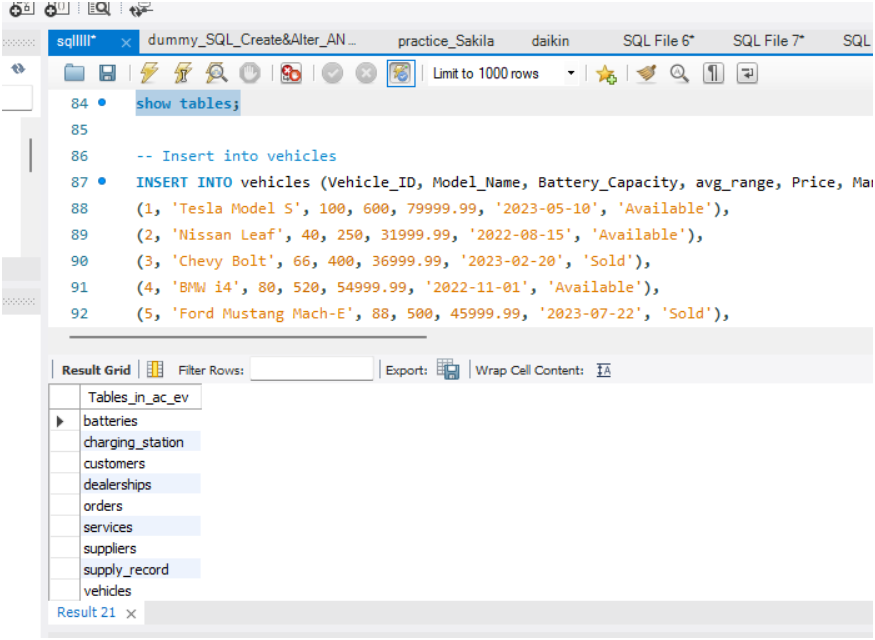

In [ ]:
!gdown --id 1KXf4-JNQGXvyjaiG3pu-BIRDq4QXTjJQ -O image.jpg

# Display the image
from PIL import Image
from IPython.display import display

image = Image.open("image.jpg")
display(image)

# CRUD Opertaions

In [ ]:
-- CRUD Operations for vehicles
-- Create
INSERT INTO vehicles (Vehicle_ID, Model_Name, Battery_Capacity, avg_range, Price, Manufacturing_Date, Status) VALUES
(21, 'Honda e', 35, 220, 32000.00, '2023-08-10', 'Available');

-- Read
SELECT * FROM vehicles;
SELECT * FROM vehicles WHERE Vehicle_ID = 1;

-- Update
UPDATE vehicles SET Price = 75999.99 WHERE Vehicle_ID = 1;

-- Delete
DELETE FROM vehicles WHERE Vehicle_ID = 21;

In [ ]:
-- CRUD Operations for customers
-- Create
INSERT INTO customers (Cust_Name, Email, Phone, Address, Date_of_Birth, Customer_Type) VALUES
('Frank Miller', 'frank@email.com', '6786786789', '303 Birch St', '1993-07-14', 'Premium');

-- Read
SELECT * FROM customers;
SELECT * FROM customers WHERE Customer_ID = 1;

-- Update
UPDATE customers SET Phone = '9999999999' WHERE Customer_ID = 1;

-- Delete
DELETE FROM customers WHERE Customer_ID = 6;

In [ ]:
-- CRUD Operations for orders
-- Create
INSERT INTO orders (Customer_ID, Vehicle_ID, Order_Date, Delivery_Date, Payment_Status) VALUES
(1, 2, '2024-06-10', '2024-06-20', 'Paid');

-- Read
SELECT * FROM orders;
SELECT * FROM orders WHERE Order_ID = 1;

-- Update
UPDATE orders SET Payment_Status = 'Pending' WHERE Order_ID = 1;

-- Delete
DELETE FROM orders WHERE Order_ID = 6;

In [ ]:
-- CRUD Operations for dealerships
-- Create
INSERT INTO dealerships (Dealer_Name, Location, Contact, Manager_Name) VALUES
('Smart EVs', 'San Diego, CA', '1231231234', 'Mike Ross');

-- Read
SELECT * FROM dealerships;
SELECT * FROM dealerships WHERE Dealership_ID = 1;

-- Update
UPDATE dealerships SET Contact = '9876543210' WHERE Dealership_ID = 1;

-- Delete
DELETE FROM dealerships WHERE Dealership_ID = 6;

In [ ]:
-- CRUD Operations for suppliers
-- Create
INSERT INTO suppliers (Supp_Name, Supp_Contact, Supp_Address) VALUES
('Energy Cells Ltd.', '7777777777', '600 Power Rd');

-- Read
SELECT * FROM suppliers;
SELECT * FROM suppliers WHERE Supplier_ID = 1;

-- Update
UPDATE suppliers SET Supp_Contact = '6666666666' WHERE Supplier_ID = 1;

-- Delete
DELETE FROM suppliers WHERE Supplier_ID = 6;

# Retreiving using JOIN commands

In [ ]:
-- Retrieve orders with customer details
SELECT orders.Order_ID, customers.Cust_Name, customers.Email, vehicles.Model_Name, orders.Order_Date, orders.Payment_Status
FROM orders
JOIN customers ON orders.Customer_ID = customers.Customer_ID
JOIN vehicles ON orders.Vehicle_ID = vehicles.Vehicle_ID;

-- Retrieve supply records with supplier and vehicle details
SELECT supply_record.Record_ID, suppliers.Supp_Name, vehicles.Model_Name, supply_record.Part, supply_record.Supply_Date
FROM supply_record
JOIN suppliers ON supply_record.Supplier_ID = suppliers.Supplier_ID
JOIN vehicles ON supply_record.Vehicle_ID = vehicles.Vehicle_ID;

-- Retrieve all vehicles with dealership information
SELECT vehicles.Vehicle_ID, vehicles.Model_Name, dealerships.Dealer_Name, dealerships.Location
FROM vehicles
JOIN dealerships ON dealerships.Dealership_ID = vehicles.Vehicle_ID;

-- Retrieve all service records with vehicle and customer details
SELECT services.Service_ID, vehicles.Model_Name, customers.Cust_Name, services.Service_Type, services.Service_Date, services.Service_Cost
FROM services
JOIN vehicles ON services.Vehicle_ID = vehicles.Vehicle_ID
JOIN orders ON orders.Vehicle_ID = vehicles.Vehicle_ID
JOIN customers ON orders.Customer_ID = customers.Customer_ID;


# 4.4  Normalisation & Testing
1st Normal Form (1NF) Check: Identify tables with multivalued attributes or repeating groups

In [ ]:
SELECT * FROM customers WHERE Cust_Name LIKE '%,%'; -- Checking for multiple names in a single field
SELECT * FROM vehicles WHERE Model_Name LIKE '%,%'; -- Checking for multiple models in one entry

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18BSG_fF39luPyMCLagSMCVxSoYwE_Svl
To: /content/image.jpg
100% 178k/178k [00:00<00:00, 28.6MB/s]


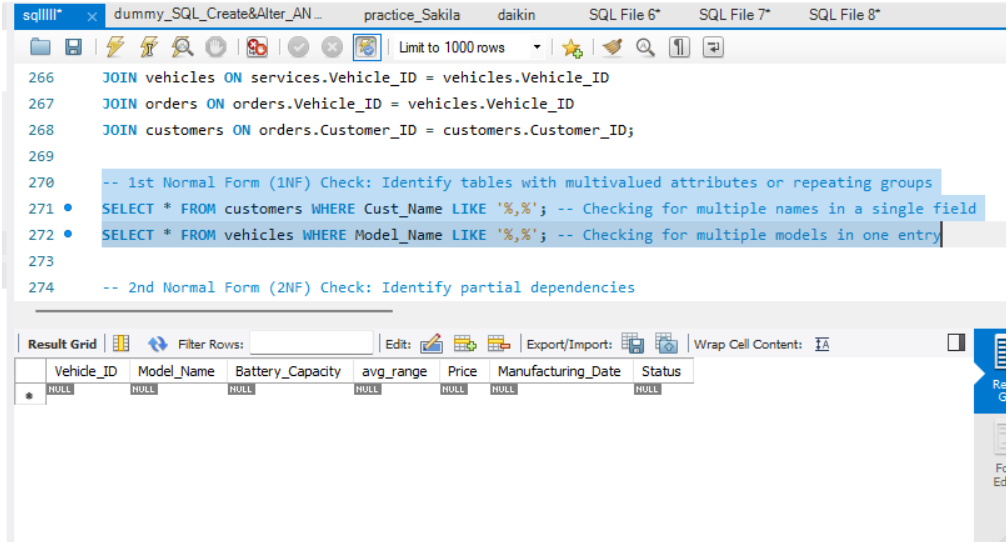

In [ ]:
!gdown --id 18BSG_fF39luPyMCLagSMCVxSoYwE_Svl -O image.jpg

# Display the image
from PIL import Image
from IPython.display import display

image = Image.open("image.jpg")
display(image)

# 2nd Normal Form (2NF) Check: Identify partial dependencies

In [ ]:
SELECT orders.Order_ID, orders.Customer_ID, customers.Cust_Name, orders.Vehicle_ID, vehicles.Model_Name
FROM orders
JOIN customers ON orders.Customer_ID = customers.Customer_ID
JOIN vehicles ON orders.Vehicle_ID = vehicles.Vehicle_ID
WHERE customers.Customer_ID IS NULL OR vehicles.Vehicle_ID IS NULL; -- Checking for partial dependencies

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=174FGH2wGFHEFe5ny-7SIFoLT415elIKF
To: /content/image.jpg
100% 168k/168k [00:00<00:00, 93.8MB/s]


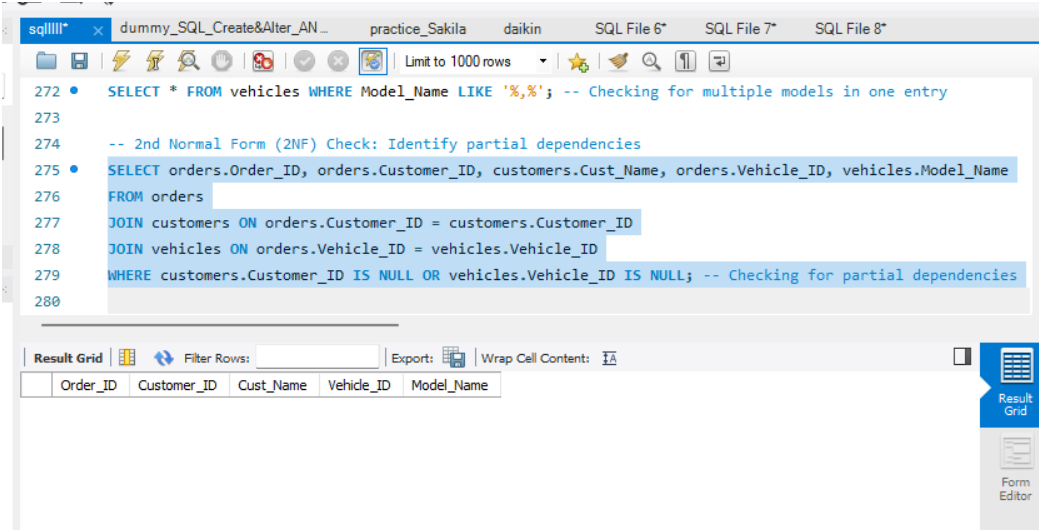

In [ ]:
!gdown --id 174FGH2wGFHEFe5ny-7SIFoLT415elIKF -O image.jpg

# Display the image
from PIL import Image
from IPython.display import display

image = Image.open("image.jpg")
display(image)

**OBSERVATION:**
1NF and 2NF checks returned 0 records, meaning your database tables do not have multivalued attributes or partial dependencies. This suggests they comply with 1NF and 2NF

# 3rd Normal Form (3NF) Check: Identify transitive dependencies

In [ ]:
SELECT customers.Customer_ID, customers.Cust_Name, orders.Order_ID, orders.Payment_Status, dealerships.Dealer_Name
FROM customers
JOIN orders ON customers.Customer_ID = orders.Customer_ID
JOIN vehicles ON orders.Vehicle_ID = vehicles.Vehicle_ID
JOIN dealerships ON vehicles.Vehicle_ID = dealerships.Dealership_ID
WHERE dealerships.Dealer_Name IS NOT NULL; -- Checking if dealership name depends indirectly on customers

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LJi1FuJxMwx6fWu1bBHsAe0-PZqY7Q4L
To: /content/image.jpg
100% 179k/179k [00:00<00:00, 83.6MB/s]


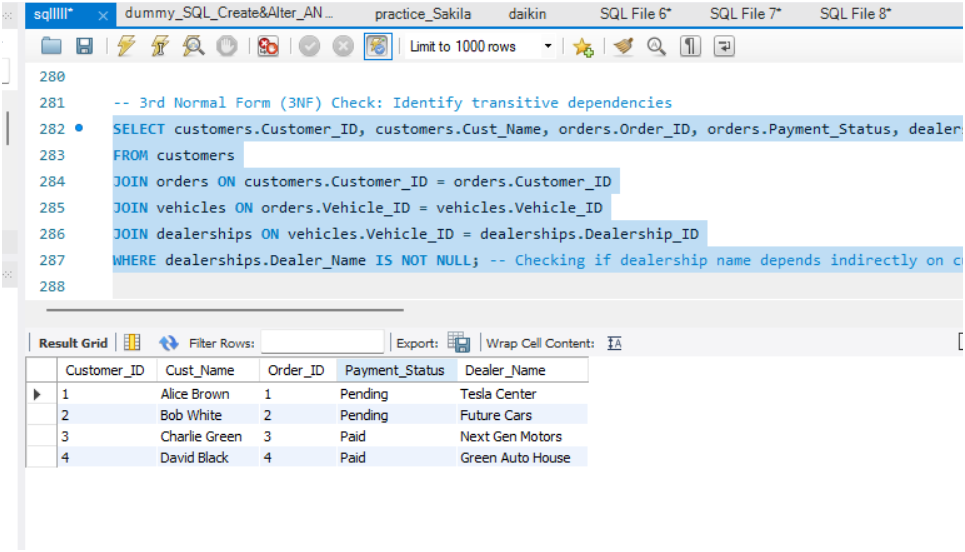

In [ ]:
!gdown --id 1LJi1FuJxMwx6fWu1bBHsAe0-PZqY7Q4L -O image.jpg

# Display the image
from PIL import Image
from IPython.display import display

image = Image.open("image.jpg")
display(image)

**OBSERVATIONS:**
3NF check returned records, which suggests a possible transitive dependency.This suggests that Dealer_Name depends on the Vehicle_ID, which in turn depends on Order_ID.

## **5. Conclusion**
The **EV Database System** was successfully designed and implemented. By following normalization principles, the database ensures **data integrity, minimal redundancy, and efficient query performance**. The use of **CRUD operations and JOIN queries** enhances data management, making it a scalable and effective solution for EV management.

## **6. Future Scope**
- Integration with **real-time EV tracking systems**.
- Development of a **web-based dashboard** for EV sales and services.
- Implementation of **advanced analytics** using big data tools.

---

### **Appendix**
- **ERD Diagram** (Attach image if available)
- **Full SQL Code for Table Creation and Queries**

This report serves as a complete documentation of the **EV Database Project** under **BDMA** coursework.

